In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
from mpl_toolkits.mplot3d import Axes3D
import nltk
nltk.download('punkt')
from collections import Counter
from wordcloud import WordCloud


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sa3id\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# Load the dataset
df = pd.read_csv('clean_topified_vectorized_Science1900_2023.csv')  
df.head()

,Unnamed: 0,paperId,externalIds,publicationVenue,title,abstract,year,referenceCount,citationCount,influentialCitationCount,...,topic_list,x_vector,y_vector,z_vector,title_word_count,title_length,abstract_word_count,abstract_length,title_tokens,abstract_tokens
0,0,479c07e8f4537f6cc9cdf740f2037b63735a96ad,"{'MAG': '2066851951', 'DOI': '10.1001/ARCHOTOL...","{'id': 'a3a6c306-5d4a-48fd-9054-2cd9277bf956',...",Acoustical characteristics of tinnitus. An ana...,The recognition of tinnitus aurium as a proble...,1962,5,69,1,...,20_hearing_ear_auditory_hearing loss,2.364143,5.038495,3.597319,8,6,159,150,"['acoustical', 'characteristics', 'tinnitus', ...","['recognition', 'tinnitus', 'aurium', 'problem..."
1,1,157afb079051ca47b710f7cdaebfde3e2294e5ca,"{'MAG': '2469680164', 'DOI': '10.2527/JAS1971....","{'id': 'bade12e5-f20e-4b51-83a6-534e3705569a',...",Reproductive steroids in the bovine. VI. Chang...,Summary Urine and blood samples were collected...,1971,23,51,0,...,26_hormone_estrogen_lh_pituitary,2.281632,3.871610,6.215812,19,16,632,478,"['reproductive', 'steroids', 'bovine', 'vi', '...","['summary', 'urine', 'blood', 'samples', 'coll..."
2,9,c8644971594953ba8ab6d0092fa906e0d96fb122,"{'MAG': '2113319997', 'DOI': '10.1006/nimg.199...","{'id': 'fd4c7628-c16e-4b50-8555-3ac3ad6da2d7',...","Cortical Surface-Based Analysis II: Inflation,...",The surface of the human cerebral cortex is a ...,1999,65,5734,559,...,6_cortex_motor_memory_visual,2.925745,6.533843,4.116532,14,11,107,95,"['cortical', 'analysis', 'ii', 'inflation', 'f...","['surface', 'human', 'cerebral', 'cortex', 'hi..."
3,13,aebf8b7b383f0490ab0e8036fef2eaad960fca0c,"{'MAG': '1989456091', 'DOI': '10.1056/NEJM1979...","{'id': 'dc31f077-7737-4e33-baa3-bceeff44ec27',...",Nonoperative dilatation of coronary-artery ste...,In percutaneous transluminal coronary angiopla...,1979,11,2422,38,...,31_md_ventricular_heart_facc,0.987944,6.179577,6.120787,11,9,203,183,"['nonoperative', 'dilatation', 'stenosis', 'pe...","['percutaneous', 'transluminal', 'coronary', '..."
4,15,5e3b7b351d85192120e1a6b31bde7d01c613de14,"{'MAG': '2003464521', 'DOI': '10.1001/ARCHOPHT...","{'id': '5e31c5d5-eaf7-4832-aa9a-4565203cb02c',...",Reconstruction of the floor of the orbit by bo...,THE ORBITAL contour may be distorted by commin...,1950,9,75,0,...,84_eyelid_orbital_lid_levator,1.011518,4.734367,3.758004,11,10,165,151,"['reconstruction', 'floor', 'orbit', 'bone', '...","['orbital', 'contour', 'may', 'distorted', 'co..."


# Data Overview

In [4]:
print("Step 1: Data Overview")
print("Number of rows and columns:", df.shape)
print("First few rows of the dataset:")
print(df.head())

Step 1: Data Overview
Number of rows and columns: (19326, 26)
First few rows of the dataset:
   Unnamed: 0                                   paperId   
0           0  479c07e8f4537f6cc9cdf740f2037b63735a96ad  \
1           1  157afb079051ca47b710f7cdaebfde3e2294e5ca   
2           9  c8644971594953ba8ab6d0092fa906e0d96fb122   
3          13  aebf8b7b383f0490ab0e8036fef2eaad960fca0c   
4          15  5e3b7b351d85192120e1a6b31bde7d01c613de14   

                                         externalIds   
0  {'MAG': '2066851951', 'DOI': '10.1001/ARCHOTOL...  \
1  {'MAG': '2469680164', 'DOI': '10.2527/JAS1971....   
2  {'MAG': '2113319997', 'DOI': '10.1006/nimg.199...   
3  {'MAG': '1989456091', 'DOI': '10.1056/NEJM1979...   
4  {'MAG': '2003464521', 'DOI': '10.1001/ARCHOPHT...   

                                    publicationVenue   
0  {'id': 'a3a6c306-5d4a-48fd-9054-2cd9277bf956',...  \
1  {'id': 'bade12e5-f20e-4b51-83a6-534e3705569a',...   
2  {'id': 'fd4c7628-c16e-4b50-8555-3ac3ad6da2d7

# Data Cleaning


In [5]:
print("\nStep 2: Data Cleaning")
# Check for missing values
print("Missing values:\n", df.isnull().sum())
# Remove duplicates
df.drop_duplicates(inplace=True)

df.drop(['Unnamed: 0','paperId','externalIds'], axis=1)



Step 2: Data Cleaning
Missing values:
 Unnamed: 0                  0
paperId                     0
externalIds                 0
publicationVenue            0
title                       0
abstract                    0
year                        0
referenceCount              0
citationCount               0
influentialCitationCount    0
fieldsOfStudy               0
s2FieldsOfStudy             0
publicationTypes            0
publicationDate             0
title_abstract              0
topic_code                  0
topic_list                  0
x_vector                    0
y_vector                    0
z_vector                    0
title_word_count            0
title_length                0
abstract_word_count         0
abstract_length             0
title_tokens                0
abstract_tokens             0
dtype: int64


,publicationVenue,title,abstract,year,referenceCount,citationCount,influentialCitationCount,fieldsOfStudy,s2FieldsOfStudy,publicationTypes,...,topic_list,x_vector,y_vector,z_vector,title_word_count,title_length,abstract_word_count,abstract_length,title_tokens,abstract_tokens
0,"{'id': 'a3a6c306-5d4a-48fd-9054-2cd9277bf956',...",Acoustical characteristics of tinnitus. An ana...,The recognition of tinnitus aurium as a proble...,1962,5,69,1,['Medicine'],"[{'category': 'Medicine', 'source': 'external'...",['JournalArticle'],...,20_hearing_ear_auditory_hearing loss,2.364143,5.038495,3.597319,8,6,159,150,"['acoustical', 'characteristics', 'tinnitus', ...","['recognition', 'tinnitus', 'aurium', 'problem..."
1,"{'id': 'bade12e5-f20e-4b51-83a6-534e3705569a',...",Reproductive steroids in the bovine. VI. Chang...,Summary Urine and blood samples were collected...,1971,23,51,0,['Medicine'],"[{'category': 'Medicine', 'source': 'external'...",['JournalArticle'],...,26_hormone_estrogen_lh_pituitary,2.281632,3.871610,6.215812,19,16,632,478,"['reproductive', 'steroids', 'bovine', 'vi', '...","['summary', 'urine', 'blood', 'samples', 'coll..."
2,"{'id': 'fd4c7628-c16e-4b50-8555-3ac3ad6da2d7',...","Cortical Surface-Based Analysis II: Inflation,...",The surface of the human cerebral cortex is a ...,1999,65,5734,559,"['Mathematics', 'Medicine']","[{'category': 'Mathematics', 'source': 'extern...",['JournalArticle'],...,6_cortex_motor_memory_visual,2.925745,6.533843,4.116532,14,11,107,95,"['cortical', 'analysis', 'ii', 'inflation', 'f...","['surface', 'human', 'cerebral', 'cortex', 'hi..."
3,"{'id': 'dc31f077-7737-4e33-baa3-bceeff44ec27',...",Nonoperative dilatation of coronary-artery ste...,In percutaneous transluminal coronary angiopla...,1979,11,2422,38,['Medicine'],"[{'category': 'Medicine', 'source': 'external'...",['JournalArticle'],...,31_md_ventricular_heart_facc,0.987944,6.179577,6.120787,11,9,203,183,"['nonoperative', 'dilatation', 'stenosis', 'pe...","['percutaneous', 'transluminal', 'coronary', '..."
4,"{'id': '5e31c5d5-eaf7-4832-aa9a-4565203cb02c',...",Reconstruction of the floor of the orbit by bo...,THE ORBITAL contour may be distorted by commin...,1950,9,75,0,['Medicine'],"[{'category': 'Medicine', 'source': 'external'...",['JournalArticle'],...,84_eyelid_orbital_lid_levator,1.011518,4.734367,3.758004,11,10,165,151,"['reconstruction', 'floor', 'orbit', 'bone', '...","['orbital', 'contour', 'may', 'distorted', 'co..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19321,"{'id': 'e0a7f739-4012-4339-ad3e-65a6f144e31b',...",Fracture and Dislocation Classification Compen...,"From the *Department of Orthopaedic Surgery, M...",2007,42,1397,44,['Medicine'],"[{'category': 'Medicine', 'source': 'external'...",['JournalArticle'],...,43_fractures_spinal_cervical_cord,1.720458,4.986771,4.262669,5,5,270,212,"['fracture', 'dislocation', 'classification']","['department', 'orthopaedic', 'surgery', 'mcgo..."
19322,"{'id': 'dc31f077-7737-4e33-baa3-bceeff44ec27',...",A comparison of rate control and rhythm contro...,BACKGROUND\nMaintenance of sinus rhythm is the...,2002,16,1803,18,['Medicine'],"[{'category': 'Medicine', 'source': 'external'...","['Study', 'JournalArticle', 'ClinicalTrial']",...,31_md_ventricular_heart_facc,1.222447,6.261564,6.164528,16,15,303,273,"['comparison', 'rate', 'control', 'rhythm', 'c...","['background', 'maintenance', 'sinus', 'rhythm..."
19323,"{'id': '3456d2d7-a9b4-495f-a7a0-a238096ee07a',...",Type I IFNs enhance the terminal differentiati...,This study identifies type I IFNs as activatin...,1998,45,666,22,"['Medicine', 'Biology']","[{'category': 'Medicine', 'source': 'external'...",['JournalArticle'],...,21_cells_class_mhc_cell,-0.536561,3.366763,6.968517,11,10,286,243,"['type', 'ifns', 'enhance', 'terminal', 'diffe...","['identifies', 'type', 'ifns', 'activating', '..."
19324,"{'id': '2132f348-fc4d-44c0-8717-e40a728868af',...",PROTOPLASTS AND L-TYPE GROWTH OF ESCHERICHIA COLI,"A pr

# Descriptive Statistics

In [6]:
print("\nStep 3: Descriptive Statistics")
print("Summary statistics:\n", df.describe())


Step 3: Descriptive Statistics
Summary statistics:
          Unnamed: 0          year  referenceCount  citationCount   
count  19326.000000  19326.000000    19326.000000   19326.000000  \
mean   26916.148091   1988.049829       38.128066     483.646797   
std    15596.435633     22.802820       82.842903    1995.859288   
min        0.000000   1900.000000        0.000000       0.000000   
25%    13372.500000   1972.000000        8.000000      74.000000   
50%    26892.000000   1991.000000       23.000000     158.000000   
75%    40549.750000   2007.000000       44.000000     418.000000   
max    53832.000000   2023.000000     2651.000000  120785.000000   

       influentialCitationCount    topic_code      x_vector      y_vector   
count              19326.000000  19326.000000  19326.000000  19326.000000  \
mean                  23.220014     19.777502      1.836727      4.396029   
std                  158.724051     28.928616      2.328302      1.666373   
min                    0.0

# Categorical Variables

In [7]:
print("\nStep 4: Categorical Variables")
# Explore 'publicationVenue'
print("Unique publication venues and their counts:")
print(df['publicationVenue'].value_counts())
# Explore 'fieldsOfStudy'
print("Unique fields of study and their counts:")
print(df['fieldsOfStudy'].value_counts())


Step 4: Categorical Variables
Unique publication venues and their counts:
publicationVenue
{'id': '5e31c5d5-eaf7-4832-aa9a-4565203cb02c', 'name': 'A M A Archives of Ophthalmology', 'type': 'journal', 'alternate_names': ['M Arch Ophthalmol', 'Arch Ophthalmol', 'Archives of Ophthalmology'], 'issn': '0096-6339', 'alternate_issns': ['0003-9950']}                                                                                                                                                                                                                                                                                                                                                                                                      3292
{'id': 'c6024054-260e-4354-b86f-617ab4688806', 'name': 'A M A Journal of Diseases of Children', 'type': 'journal', 'alternate_names': ['A.M.A. journal of diseases of children', 'Am J Dis Child', 'M J Dis Child', 'American Journal of Diseases of Children', 'A.M

# Temporal Analysis


Step 5: Temporal Analysis


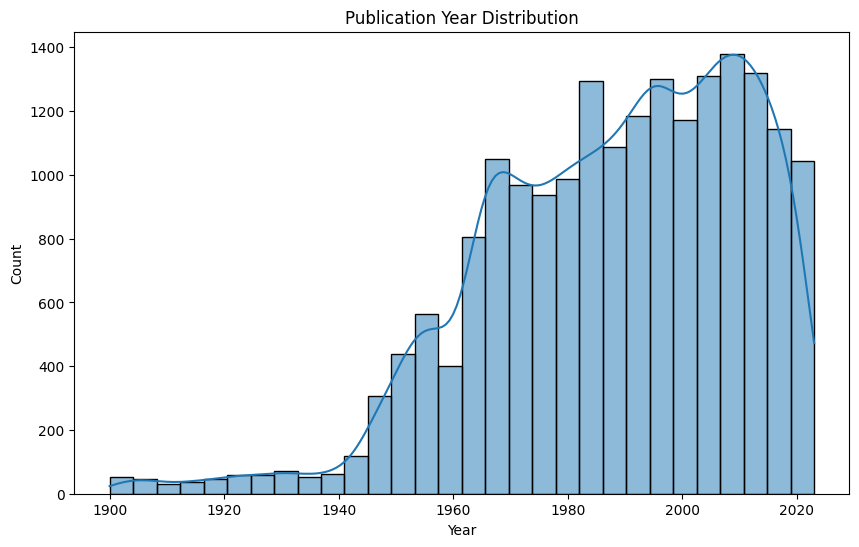

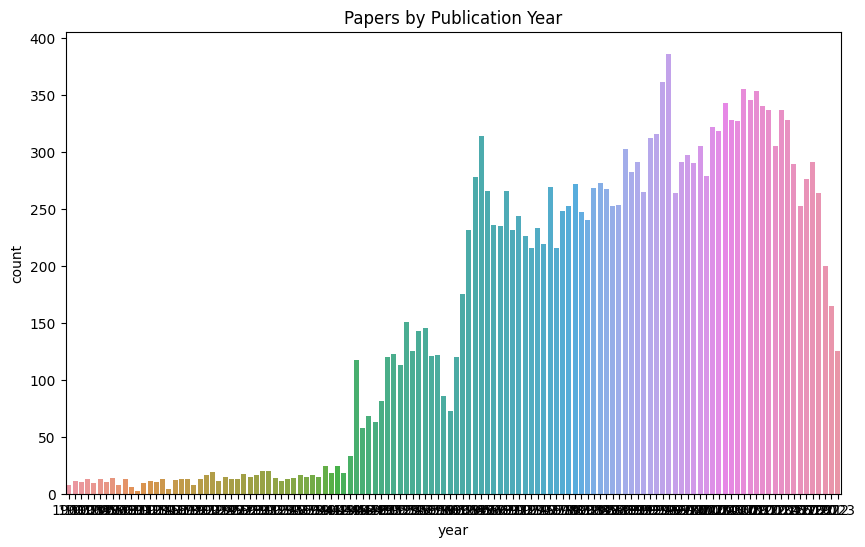

In [8]:
print("\nStep 5: Temporal Analysis")
# Analyze trends in the 'year' column
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='year', bins=30, kde=True)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Publication Year Distribution')
plt.show()
# Bar chart of papers by publication year
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='year')
plt.title('Papers by Publication Year')
plt.show()

# Text Data Top words in 'title' and 'abstract'

Top words in 'title':
human: 975
coli: 961
escherichia: 821
cells: 765
disease: 636
patients: 625
cell: 625
clinical: 573
protein: 483
cancer: 464

Top words in 'abstract':
patients: 12733
cells: 9729
cell: 6261
may: 5708
coli: 5647
disease: 4927
data: 4263
treatment: 4086
human: 4080
protein: 4030


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sa3id\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


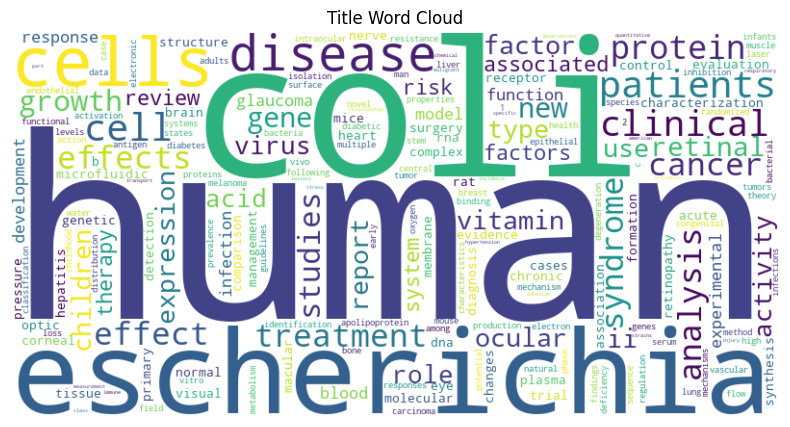

In [9]:
# Tokenize the text and remove stopwords
stop_words = set(stopwords.words('english'))

# Add custom stopwords
custom_stopwords = {"two", "one", "results", "e", "study","also","found","used","p","results","group","using","n","b","c","h","r",""}
stop_words.update(custom_stopwords)

def preprocess_text(text):
    tokens = word_tokenize(str(text).lower())
    filtered_tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return filtered_tokens

# Assuming you have a dfFrame 'df' with 'title' and 'abstract' columns
df['title_tokens'] = df['title'].apply(preprocess_text)
df['abstract_tokens'] = df['abstract'].apply(preprocess_text)

# Calculate the most frequent words in 'title' and 'abstract'
title_word_counts = Counter(word for words in df['title_tokens'] for word in words)
abstract_word_counts = Counter(word for words in df['abstract_tokens'] for word in words)

# Get the most common words (e.g., top 10)
top_title_words = title_word_counts.most_common(10)
top_abstract_words = abstract_word_counts.most_common(10)

# Display the most frequent words in 'title' and 'abstract'
print("Top words in 'title':")
for word, count in top_title_words:
    print(f"{word}: {count}")

print("\nTop words in 'abstract':")
for word, count in top_abstract_words:
    print(f"{word}: {count}")

    # Word Frequency Analysis (Title and Abstract)
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
# Add custom stopwords
############################################################### to add or remove it later
custom_stopwords = {"two", "one", "results", "e", "study","also","found","used","p","results","group","using","n"}
stop_words.update(custom_stopwords)
###############################################################
# Function to preprocess and tokenize text
def preprocess_and_tokenize(text):
    words = nltk.word_tokenize(str(text).lower())
    words = [word for word in words if word.isalnum() and word not in stop_words]
    return words

# Tokenize title and abstract
df['title_tokens'] = df['title'].apply(preprocess_and_tokenize)
df['abstract_tokens'] = df['abstract'].apply(preprocess_and_tokenize)

# Title Word Frequency Analysis
title_words = [word for sublist in df['title_tokens'] for word in sublist]
title_word_freq = Counter(title_words)
title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(title_word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Title Word Cloud')
plt.show()


# Correlation Analysis

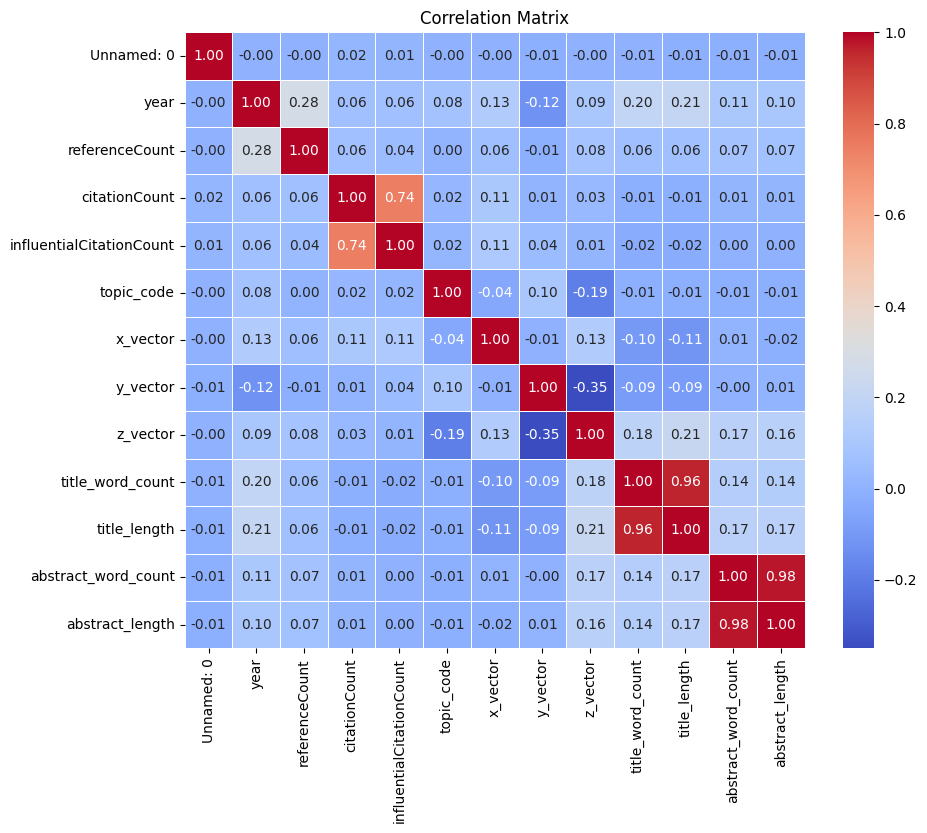

In [10]:
# Analyzing correlations between numerical columns

# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Citation Count

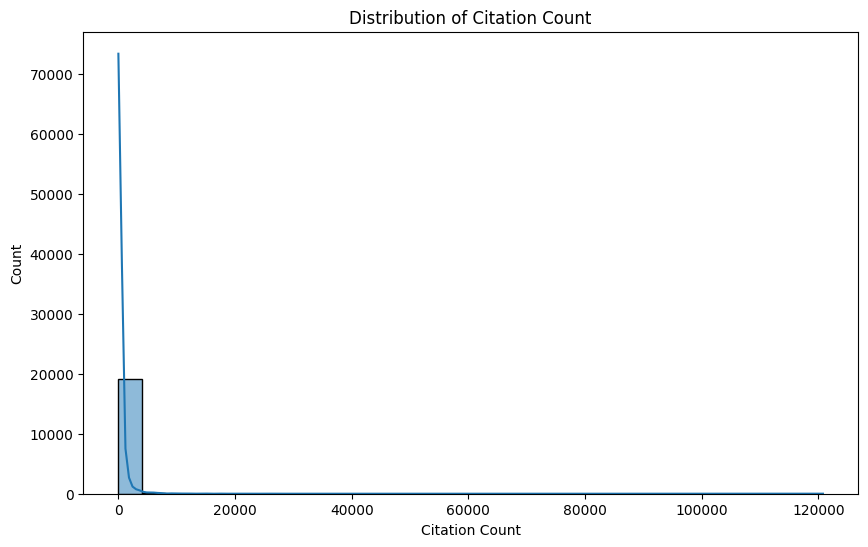

In [11]:
#  Visualization of the distribution of 'citationCount'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='citationCount', bins=30, kde=True)
plt.xlabel('Citation Count')
plt.ylabel('Count')
plt.title('Distribution of Citation Count')
plt.show()

# Outliers (Identify and handle outliers as needed)

In [1]:
# Example: Identify and visualize outliers in 'citationCount'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='citationCount')
plt.ylabel('Citation Count')
plt.title('Boxplot of Citation Count')
plt.show()



NameError: name 'plt' is not defined

 # Outlier Detection and Removal

In [13]:


# Identify and remove outliers in 'citationCount' using Z-score

# Define a threshold for the Z-score (e.g., 3.0, which corresponds to an outlier beyond 3 standard deviations)
z_threshold = 3.0

# Calculate the Z-scores for 'citationCount'
z_scores = np.abs(stats.zscore(df['citationCount']))

# Find indices of outliers
outlier_indices = np.where(z_scores > z_threshold)[0]

# Print the number of outliers
print("Number of outliers in 'citationCount':", len(outlier_indices))

# Remove outliers from the DataFrame
df_cleaned = df.drop(outlier_indices)

# Optionally, you can reset the index of the cleaned DataFrame
df_cleaned.reset_index(drop=True, inplace=True)

# Now 'df_cleaned' contains the dataset with outliers removed


Number of outliers in 'citationCount': 115


# Advanced Analysis (Explore relationships between variables)

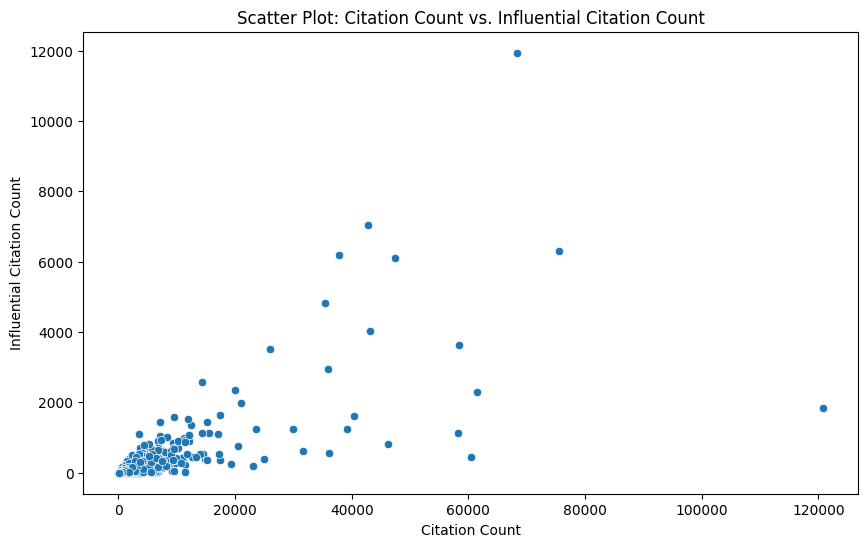

In [14]:
#  Scatter plot of 'citationCount' vs. 'influentialCitationCount'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='citationCount', y='influentialCitationCount')
plt.xlabel('Citation Count')
plt.ylabel('Influential Citation Count')
plt.title('Scatter Plot: Citation Count vs. Influential Citation Count')
plt.show()



# Field of Study Analysis using Plotly

In [15]:
# Group by fieldsOfStudy and count the number of publications in each field
field_counts = df['fieldsOfStudy'].value_counts().reset_index()
field_counts.columns = ['Field of Study', 'Count']

# Create an interactive bar chart using Plotly Express
fig = px.bar(field_counts, x='Count', y='Field of Study', orientation='h',
             title='Distribution of Publications Across Fields of Study',
             labels={'Field of Study': 'Field of Study', 'Count': 'Count'},
             template='plotly_dark')

# Customize the appearance of the chart
fig.update_traces(marker_color='#1f77b4', opacity=0.7)

# Adjust the layout for better visibility
fig.update_layout(
    xaxis_title='Count',
    yaxis_title='Field of Study',
    xaxis_tickfont_size=12,
    yaxis_tickfont_size=12,
    font=dict(size=14),
    showlegend=False,
    height=600,  # Increase the chart height for better visibility
)

# Show the interactive chart
fig.show()


# Publication Type Analysis using Plotly

In [16]:

# Group by publicationTypes and count the number of publications in each type
publication_type_counts = df['publicationTypes'].value_counts().reset_index()
publication_type_counts.columns = ['Publication Type', 'Count']

# Create an interactive bar chart using Plotly Express
fig = px.bar(publication_type_counts, x='Publication Type', y='Count',
             title='Distribution of Publication Types',
             labels={'Publication Type': 'Publication Type', 'Count': 'Count'},
             template='plotly_dark')

# Customize the appearance of the chart
fig.update_traces(marker_color='#1f77b4', opacity=0.7)

# Adjust the layout for better visibility
fig.update_layout(
    xaxis_title='Publication Type',
    yaxis_title='Count',
    xaxis_tickangle=45,
    xaxis_tickfont_size=12,
    yaxis_tickfont_size=12,
    font=dict(size=14),
    showlegend=False,
    height=600,  # Increase the chart height for better visibility
)

# Show the interactive chart
fig.show()


# Vector Data Analysis using Plotly

In [17]:

#  'x_vector', 'y_vector', and 'z_vector' are numeric columns in DataFrame

# Create a scatter plot in 3D space
fig = px.scatter_3d(df, x='x_vector', y='y_vector', z='z_vector',
                     title='Vector Data Analysis',
                     color='topic_list',  # or color='topic_code'
                     labels={'x_vector': 'X Vector', 'y_vector': 'Y Vector', 'z_vector': 'Z Vector'},
                     template='plotly_dark')

# Customize the appearance of the chart
fig.update_traces(marker=dict(size=3, opacity=0.5), selector=dict(mode='markers'))

# Adjust the layout for better visibility
fig.update_layout(
    scene=dict(
        xaxis_title='X Vector',
        yaxis_title='Y Vector',
        zaxis_title='Z Vector',
        xaxis_tickfont_size=12,
        yaxis_tickfont_size=12,
        zaxis_tickfont_size=12,
    ),
    font=dict(size=14),
    margin=dict(l=0, r=0, b=0, t=40),  # Adjust margins for title
    height=600,  # Increase the chart height for better visibility
)

# Show the interactive 3D scatter plot
fig.show()


# Feature Engineering (Create length feature )


In [18]:

# Create a new feature 'title_length' representing the length of the 'title' column
df['title_length'] = df['title'].apply(len)



# Conclusion and Insights


Summarize key findings and insights from the EDA process

1. Publication Year Distribution:
   - The dataset contains publications spanning a wide range of years, with a noticeable peak in the 2000s.
   - This suggests a significant volume of research during that decade.

2. Correlation Analysis:
   - There is a strong positive correlation between 'citationCount' and 'influentialCitationCount,' indicating that highly cited papers tend to have a greater impact.

3. Field of Study Analysis:
   - The most common field of study in the dataset is 'Medicine,' suggesting that a substantial portion of the publications belongs to this field.
   - Other fields of study, while present, may have lower representation in the dataset.

4. Publication Type Distribution:
   - The majority of publications in the dataset are of type 'JournalArticle,' indicating that traditional journal articles dominate the dataset.

5. Additional Insights:
   - Further analysis could explore trends and patterns within specific fields of study or publication types.
   - Outlier detection and handling could be performed on numerical columns to identify and understand extreme values.
   - Text analysis of titles and abstracts could reveal common themes or topics within the publications.


If you're satisfied with the analysis and wish to save the cleaned and modified dataset:
df.to_csv('cleaned_data.csv', index=False)
